In [1]:
# Choose a user:
USER = 'Danny'

# |
# |
# |
# |
# |
# |
# v

# Check input user...
USER_LIST = ['Eole', 'Danny', 'Cindy']
assert (USER in USER_LIST), \
"`USER` value is invalid: {user_val} \nChoose value in: {user_list}".format(user_val = USER, user_list = USER_LIST)

# Define file path
save_load_path = None

if USER == 'Eole':
    save_load_path = '/home/eolus/Dropbox/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles'
elif USER == 'Danny':
    save_load_path = '/Users/Dannyhsiao/Dropbox/MA755 Public (1)/pynotes/Danny-Eole-Yuchen/Pickles'
elif USER == 'Cindy':
    save_load_path = '/Users/YuchenZhou/Dropbox/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles'
        
# PATHS...
# '/Users/Dannyhsiao/Dropbox/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles'
# '/home/eolus/Dropbox/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles'
# '/Users/YuchenZhou/Dropbox/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles'

In [2]:
import pandas as pd
import numpy as np
import os
import itertools as it
import matplotlib.pyplot as plt
import math
import h5py 
import os
import itertools
from sklearn.preprocessing import scale
import re
%matplotlib inline

In [3]:
def pcf(matrix):
    #scale the data
    A_s = scale(matrix, with_mean=True,with_std=True,axis=0)
    #covariance matrix
    A_c = np.cov(A_s.T)
    #Get the eign values and eign vectors
    eig_val_cov, eig_vec_cov = np.linalg.eig(A_c)
    eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i])
             for i in range(len(eig_val_cov))]
    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs.sort
    eig_pairs.reverse
    return(eig_pairs)

In [4]:
def extract_eign(pair):
    eig_val=[0]*len(pair)
    index=0
    for i in pair:
        eig_val[index]=i[0]
        index+=1
    return(eig_val)

In [5]:
def var_explained(eig,i):
    cum_per=0
    per_var=0
    for e_val in (eig[0:i]):
        per_var = round((e_val / len(eig)),3)
        cum_per+=per_var
    return(cum_per)

In [6]:
dtm_binary_matrix = np.load(save_load_path+'/lyrics_english_binary_matrix.npy')

print ("document term matrix:")
print ()
print (dtm_binary_matrix)
print ()
print ("shape:{shape}".format(shape = dtm_binary_matrix.shape))

document term matrix:

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]

shape:(1980, 3394)


In [14]:
# Normalization brefore PCA

import numpy as np
import sklearn
from sklearn.preprocessing import normalize

dtm_binary_matrix=sklearn.preprocessing.normalize(dtm_binary_matrix,norm='l2',axis=1)


In [15]:
pc_binary = pcf(dtm_binary_matrix)   # Each PC is a list of two items: 
                             #   1. the 'Eigen Value' 
                             #   2. an array of the 'Eigen vector' (loadings to each variable)

In [16]:
print(pc_binary[0])

(24.815240016539018, array([ -1.53729583e-04+0.j,  -3.47217728e-04+0.j,  -4.70455707e-04+0.j,
       ...,   1.98670442e-01+0.j,  -2.12261121e-04+0.j,
        -3.26870513e-04+0.j]))


In [17]:
pceign_binary=extract_eign(pc_binary)

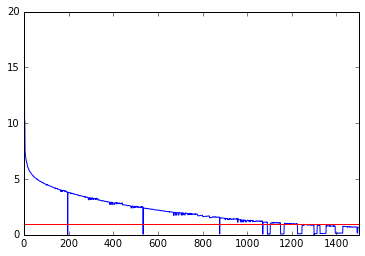

In [18]:
plt.plot(pceign_binary)
plt.axis([0,1500,0,20])
plt.axhline(y=1,color='r')

In [19]:
num_pc_binary = 735

In [20]:
var_explained(pceign_binary,num_pc_binary)

0.8000000000000006

In [21]:
# Eigen vector len = number of track_IDs
len_vector = dtm_binary_matrix.shape[1]

# Initialize
w_matrix_binary = np.empty([len_vector,1], dtype = float)

# Fill by stacking eigen vectors vertically
for i in range(num_pc_binary):
    pc_col = pc_binary[i][1].reshape(len_vector,1)
    w_matrix_binary = np.hstack((w_matrix_binary, pc_col))

# Delete initialized empty column on left hand side
w_matrix_binary = np.delete(w_matrix_binary,0,1).astype(float)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: ComplexWarning: Casting complex values to real discards the imaginary part


In [22]:
print(w_matrix_binary.shape)
print('****************************************************')
print(w_matrix_binary)

(3394, 735)
****************************************************
[[ -1.53729583e-04  -8.64069056e-05  -3.06214688e-03 ...,  -1.89019895e-02
    1.47007974e-02   7.20330928e-03]
 [ -3.47217728e-04   7.68457740e-05  -2.82198409e-04 ...,  -1.65166734e-03
    5.29708706e-03   1.49468561e-03]
 [ -4.70455707e-04   8.53679961e-04   4.81621277e-03 ...,  -2.17379101e-02
    2.46366185e-02  -4.81898734e-02]
 ..., 
 [  1.98670442e-01   2.25241531e-02   6.29833054e-03 ...,  -5.00064327e-04
    1.48385401e-04   5.80372749e-04]
 [ -2.12261121e-04   6.59439466e-05  -3.94933688e-03 ...,   2.30293100e-02
    1.18636417e-02  -1.47916005e-02]
 [ -3.26870513e-04   3.74723483e-04   1.26219613e-03 ...,   3.60052958e-02
    3.17637926e-02   1.12019108e-03]]


In [23]:
pc_scores_binary = dtm_binary_matrix.dot(w_matrix_binary)
pc_scores_binary.shape

(1980, 735)

In [24]:
pc_scores_binary

array([[-0.00934212,  0.00904517, -0.00605839, ..., -0.03381414,
         0.01278135,  0.00338924],
       [-0.00615714,  0.00724154,  0.0130388 , ..., -0.01303104,
        -0.01025459, -0.03533667],
       [-0.0050506 ,  0.00701094,  0.00448776, ...,  0.05241984,
         0.02501586, -0.01454312],
       ..., 
       [-0.00425722,  0.00460619, -0.00760419, ..., -0.00738771,
         0.01916278, -0.01265211],
       [-0.00865367,  0.00950031,  0.02978454, ..., -0.00495239,
         0.00760906,  0.01468733],
       [-0.00753289,  0.00893321,  0.01881999, ...,  0.01918085,
         0.00364184,  0.00640421]])

In [25]:
# Checkpoint - pickle pickle pickle!
np.save(save_load_path+'/pc_scores_binary', pc_scores_binary)